In [2]:
import pandas as pd
import numpy as np

C:\Users\solas\OneDrive\Documents\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\solas\OneDrive\Documents\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Importing Dataset

In [3]:
df = pd.read_csv(r"C:\Users\solas\Downloads\data.xlsx - Sheet1.csv")

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Exploratory Data Analysis

In [6]:
df.dtypes

ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
Electrical

In [7]:
df.tail()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,324966,400000.0,2/1/13 0:00,present,senior systems engineer,Chennai,f,2/26/91 0:00,70.60,cbse,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [8]:
# Strip any time information
df['DOJ'] = df['DOJ'].str.split().str[0]

# Convert 'DOJ' column to the desired date format (YYYY-MM-DD)
df['DOJ'] = pd.to_datetime(df['DOJ'], format="%m/%d/%y").dt.strftime("%Y-%m-%d")

In [9]:
df['DOJ']

0       2012-06-01
1       2013-09-01
2       2014-06-01
3       2011-07-01
4       2014-03-01
           ...    
3993    2011-10-01
3994    2013-07-01
3995    2013-07-01
3996    2014-07-01
3997    2013-02-01
Name: DOJ, Length: 3998, dtype: object

In [10]:
df['DOB'] = df['DOB'].str.split().str[0]

# Convert 'DOJ' column to the desired date format (YYYY-MM-DD)
df['DOB'] = pd.to_datetime(df['DOB'], format="%m/%d/%y").dt.strftime("%Y-%m-%d")

In [11]:
df['DOB']

0       1990-02-19
1       1989-10-04
2       1992-08-03
3       1989-12-05
4       1991-02-27
           ...    
3993    1987-04-15
3994    1992-08-27
3995    1991-07-03
3996    1992-03-20
3997    1991-02-26
Name: DOB, Length: 3998, dtype: object

In [12]:
df.dtypes

ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
Electrical

In [13]:
df.duplicated

<bound method DataFrame.duplicated of           ID     Salary         DOJ           DOL  \
0     203097   420000.0  2012-06-01       present   
1     579905   500000.0  2013-09-01       present   
2     810601   325000.0  2014-06-01       present   
3     267447  1100000.0  2011-07-01       present   
4     343523   200000.0  2014-03-01   3/1/15 0:00   
...      ...        ...         ...           ...   
3993   47916   280000.0  2011-10-01  10/1/12 0:00   
3994  752781   100000.0  2013-07-01   7/1/13 0:00   
3995  355888   320000.0  2013-07-01       present   
3996  947111   200000.0  2014-07-01   1/1/15 0:00   
3997  324966   400000.0  2013-02-01       present   

                      Designation           JobCity Gender         DOB  \
0         senior quality engineer         Bangalore      f  1990-02-19   
1               assistant manager            Indore      m  1989-10-04   
2                systems engineer           Chennai      f  1992-08-03   
3        senior software engi

In [14]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [15]:
df.shape

(3998, 38)

# Univariate Analysis

#### Non-vizualization

In [16]:
unique_combinations = df[['Designation', 'JobCity', 'Gender','10board']].drop_duplicates()

In [17]:
unique_combinations

,Designation,JobCity,Gender,10board
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap"
1,assistant manager,Indore,m,cbse
2,systems engineer,Chennai,f,cbse
3,senior software engineer,Gurgaon,m,cbse
4,get,Manesar,m,cbse
...,...,...,...,...
3993,software engineer,New Delhi,m,cbse
3994,technical writer,Hyderabad,f,state board
3995,associate software engineer,Bangalore,m,"bse,odisha"
3996,software developer,Asifabadbanglore,f,state board


In [18]:
unique_combinations.nunique()

Designation    419
JobCity        339
Gender           2
10board        275
dtype: int64

In [19]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [20]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [21]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [22]:
df['10percentage'].mean()

77.9254427213607

In [23]:
df[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']] = df[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].replace(-1,0)

In [24]:
df[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']]

,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3993,0,0,0,0,0
3994,0,0,0,0,0
3995,0,0,0,0,0
3996,438,0,0,0,0


In [25]:
df['JobCity'] = df['JobCity'].str.lower()
df['Designation']= df['Designation'].str.lower()
df['10board']= df['10board'].str.lower()

In [26]:
df['JobCity'].nunique()

262

In [27]:
df['Designation'].nunique()

419

In [28]:
df['10board'].nunique()

275

##### Count (number of non-null entries) Mean Standard Deviation Min and Max 25th, 50th (Median), and 75th percentiles

In [29]:
df[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].describe()

,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,91.516758,23.915958,17.438469,32.757629,3.673337
std,174.867677,97.893295,87.394072,104.568796,36.559052
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,715.000000,623.000000,676.000000,548.000000,516.000000


##### Skweness

In [30]:
df[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','10percentage']].skew()

ComputerScience     1.530511
MechanicalEngg      4.030835
ElectricalEngg      5.062039
TelecomEngg         3.042584
CivilEngg          10.319461
10percentage       -0.591019
dtype: float64

##### Kurtosis

In [31]:
df[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','10percentage','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']].kurtosis()

ComputerScience            0.697248
MechanicalEngg            15.032665
ElectricalEngg            24.899819
TelecomEngg                7.821100
CivilEngg                109.142713
10percentage              -0.110284
conscientiousness          0.122596
agreeableness              3.391242
extraversion               0.643969
nueroticism               -0.191539
openess_to_experience      5.788327
dtype: float64

#### Visualization

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df['10percentage'].dtype

dtype('float64')

In [34]:
df.head(2)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.1076,0.8637


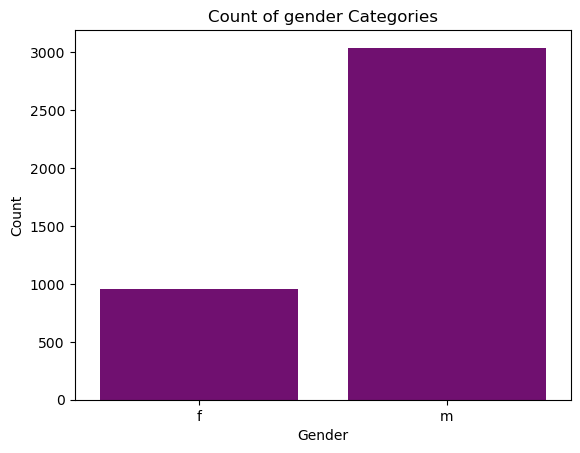

In [35]:
sns.countplot(x='Gender', data=df,color = 'purple')
plt.title('Count of gender Categories')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Frequency')

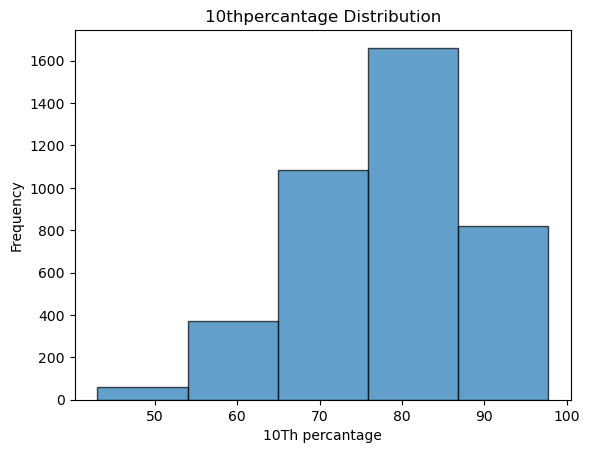

In [36]:
plt.hist(df['10percentage'], bins=5, edgecolor='k', alpha=0.7)
plt.title('10thpercantage Distribution')
plt.xlabel('10Th percantage')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

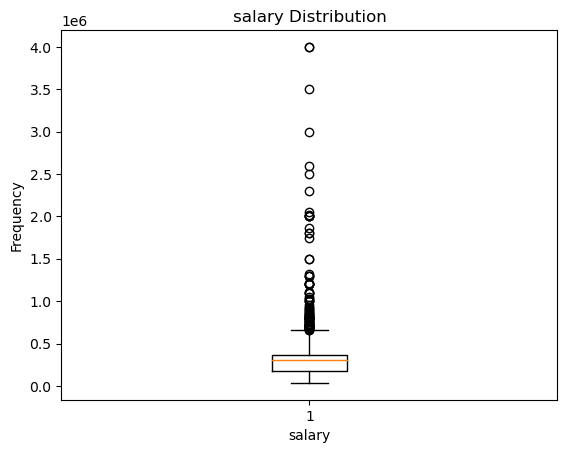

In [37]:
plt.boxplot(df['Salary'])
plt.title('salary Distribution')
plt.xlabel('salary')
plt.ylabel('Frequency')


In [38]:
df.loc[(df.Salary>1000000),['JobCity','Salary']]

,JobCity,Salary
3,gurgaon,1100000.0
92,hyderabad,1500000.0
123,maharajganj,1200000.0
166,mumbai,1860000.0
383,bangalore,1110000.0
394,bangalore,1200000.0
500,-1,2600000.0
725,bangalore,1025000.0
771,angul,1300000.0
779,pune,3500000.0


In [39]:
df.loc[(df.CollegeTier==1),['10board']].value_counts()

10board                                        
cbse                                               190
state board                                         38
icse                                                26
0                                                   18
up board                                             8
rbse                                                 3
hbse                                                 2
pseb                                                 2
mp                                                   1
ssc                                                  1
maharashtra state board for ssc                      1
maharashtra state board mumbai divisional board      1
board of school education haryana                    1
maharashtra state board                              1
gseb                                                 1
central board of secondary education                 1
bseb,patna                                           1
uttar pradesh    

## Bi- Variate Analysis

In [40]:
correlation = df['10percentage'].corr(df['Salary'])
correlation

0.17737277344849336

In [41]:
crosstab = pd.crosstab(df['JobCity'], df['Gender'])
crosstab

Gender,f,m
JobCity,,
ariyalur,0,1
bangalore,1,0
chennai,0,1
delhi,0,1
mumbai,0,3
...,...,...
vijayawada,1,1
visakhapatnam,2,5
vizag,0,3


In [42]:
# Group by 'Gender and calculate the mean salary for each group, then broadcast the result
df['Mean_Salary'] = df.groupby('JobCity')['10percentage'].transform('mean')
df['Mean_Salary'] 

0       79.471175
1       74.345200
2       81.818783
3       76.564810
4       82.000000
          ...    
3993    57.845000
3994    81.225154
3995    79.471175
3996    78.720000
3997    81.818783
Name: Mean_Salary, Length: 3998, dtype: float64

In [43]:
df.tail(2)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Mean_Salary
3996,947111,200000.0,2014-07-01,1/1/15 0:00,software developer,asifabadbanglore,f,1992-03-20,78.72,state board,...,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,78.720000
3997,324966,400000.0,2013-02-01,present,senior systems engineer,chennai,f,1991-02-26,70.60,cbse,...,0,0,0,0,-1.1128,-0.2793,-0.6343,1.32553,-0.6035,81.818783


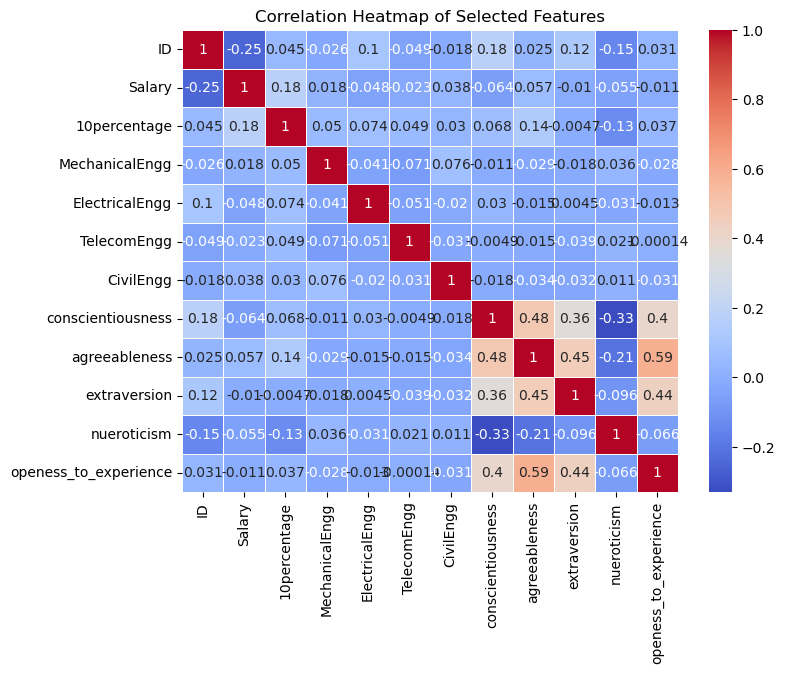

In [44]:
numerical_columns = ['ID', 'Salary', '10percentage','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']  # Update this with your actual numerical columns

# Create the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [58]:
y_df=df.groupby('GraduationYear')
y_df.Salary.mean()

GraduationYear
0       325000.000000
2007    120000.000000
2009    365625.000000
2010    441318.493151
2011    369684.418146
2012    315478.158205
2013    277810.330229
2014    267924.710425
2015    299574.468085
2016    295714.285714
2017    195625.000000
Name: Salary, dtype: float64

In [60]:
df.GraduationYear.value_counts()

GraduationYear
2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: count, dtype: int64

In [62]:
df.loc[(df.MechanicalEngg),['GraduationYear']].value_counts()

GraduationYear
2011              3792
2014                78
2012                52
2013                42
2010                34
Name: count, dtype: int64

In [63]:
df.loc[(df.TelecomEngg),['GraduationYear']].value_counts()

GraduationYear
2011              3643
2014               141
2012               128
2013                85
2010                 1
Name: count, dtype: int64

In [64]:
df.loc[(df.CivilEngg),['GraduationYear']].value_counts()

GraduationYear
2011              3958
2012                25
2014                 7
2013                 6
2009                 1
2010                 1
Name: count, dtype: int64

In [65]:
df.Gender.value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

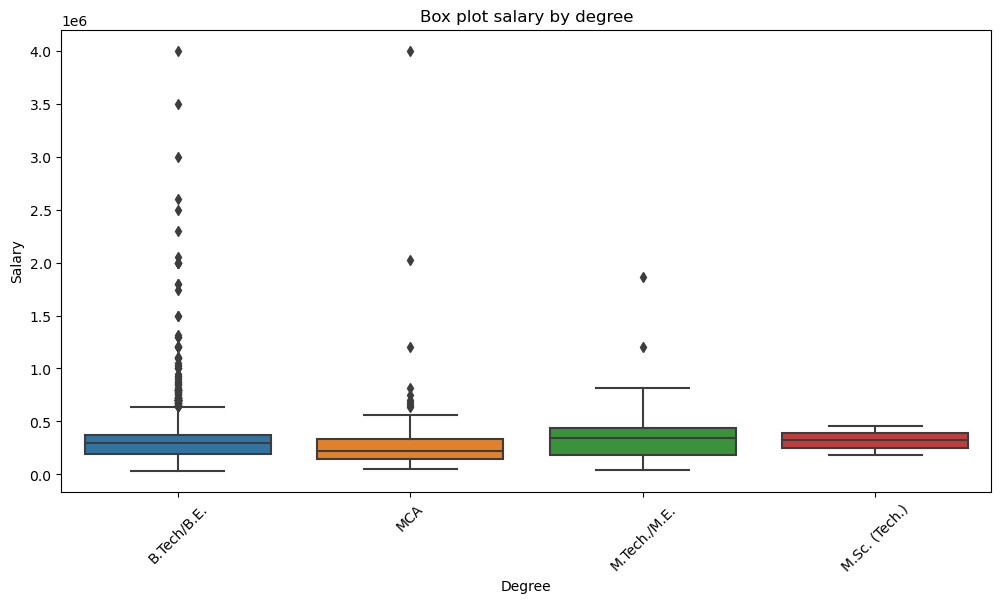

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df ,x="Degree",y='Salary')
plt.title("Box plot salary by degree")
plt.xticks(rotation=45)

plt.show()

In [71]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Mean_Salary'],
      dtype='object')

## Research Questions


Times of India article dated Jan 18, 2019 states that 
“After doing your Computer Science Engineering if you take up jobs as 
a Programming Analyst, Software Engineer, Hardware Engineer and 
Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 
Test this claim with the data given to you.


In [75]:
# Filter data for fresh graduates with the relevant job titles
relevant_jobs = ['Programming Analyst', 'Software Engineer', 
                 'Hardware Engineer', 'Associate Engineer']
filtered_data = df[(df['Specialization'] == 'Computer Science Engineering') & 
                     (df['Designation'].isin(relevant_jobs))]


In [77]:
# Calculate salary statistics for the filtered data
average_salary = filtered_data['Salary'].mean()
median_salary = filtered_data['Salary'].median()
min_salary = filtered_data['Salary'].min()
max_salary = filtered_data['Salary'].max()


In [84]:
#Check the percentage of graduates earning between 2.5 to 3 lakhs
# Function to convert lakhs to integers
max_value= 2.5 * 100000
min_value = 3*100000
def convert_to_integer(amount_in_lakhs):
    return float(amount_in_lakhs) * 100000

# Applying the function to the dataset
salary_range = filtered_data[(filtered_data['Salary'] >= max_value) & (filtered_data['Salary'] <= min_value)]
if len(df) > 0:  # Check if df is not empty
    percentage_in_range = (len(salary_range) / len(df)) * 100
else:
    percentage_in_range = 0 

In [85]:
print(f"Average Salary: {average_salary} lakhs")
print(f"Median Salary: {median_salary} lakhs")
print(f"Salary Range: {min_salary} - {max_salary} lakhs")
print(f"Percentage of graduates earning between 2.5 and 3 lakhs: {percentage_in_range:.2f}%")

Average Salary: nan lakhs
Median Salary: nan lakhs
Salary Range: nan - nan lakhs
Percentage of graduates earning between 2.5 and 3 lakhs: 0.00%


In [91]:
from scipy.stats import chi2_contingency
# Create a contingency table between gender and specialization
contingency_table = pd.crosstab(df['Gender'],df['Specialization'])


# Perform the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the Chi-square statistic and p-value
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant relationship between gender and specialization (reject the null hypothesis).")
else:
    print("There is no significant relationship between gender and specialization (fail to reject the null hypothesis).")

Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization (reject the null hypothesis).


# Conclusion

### Yes their is a relationship between Gender and specialization are significantly related, leading to the rejection of the null hypothesis.

#### 